/var/folders/t4/gw8k_q5x36d1sm338cpl80_80000gr/T/ipykernel_19109/309555031.py:6: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(2 * R  / (3 * lambda_ * r))
/var/folders/t4/gw8k_q5x36d1sm338cpl80_80000gr/T/ipykernel_19109/2686209398.py:11: RuntimeWarning: divide by zero encountered in divide
  F = (2 / np.pi) * np.arccos(np.exp(-B * (R - r) / (2 * r * np.sin(phi))))


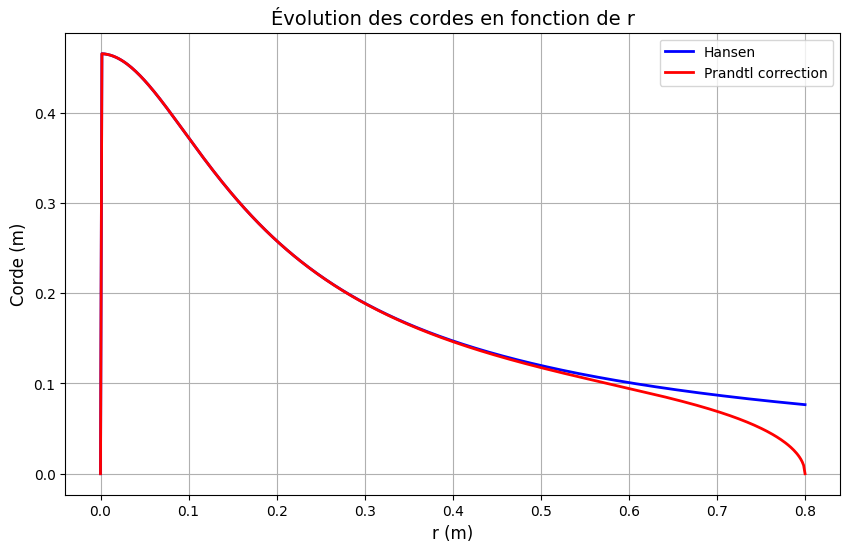

'chord_data.csv'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def phi(R, r, lambda_):
    """Phi angle according to Lysen's and Hansen's formula"""
    return np.arctan(2 * R  / (3 * lambda_ * r))

def chord_hansen(R, r, B, lambda_, CL_opt, phi):
    """Chord according to lysen's formula"""
    return (4 * r * np.pi * np.sin(phi)**2 /  (  B * CL_opt * np.cos(phi))) 


def chord_hansen_correction(R, r, B, lambda_, CL_opt, phi):
    """ Prandtl's correction"""
    F = (2 / np.pi) * np.arccos(np.exp(-B * (R - r) / (2 * r * np.sin(phi))))
    return (4 * r * np.pi * np.sin(phi)**2 /  (  B * CL_opt * np.cos(phi))) * F 

# Paramètres
lambda_opt = 4  # Rapport de vitesse
R = 0.8       # Rayon de l'éolienne (m)
CL_opt = 1.2    # Coefficient de portance optimal
B = 3           # Nombre de pales

# Positions radiales r (de 0 à R)
r = np.linspace(0, R, 500)

# Calcul de Phi
phi_values = phi(R, r, lambda_opt)

# Calcul des cordes pour chaque méthode
chord_hansen_values = chord_hansen(R, r, B, lambda_opt, CL_opt, phi_values)
chord_prandtl_values = chord_prandtl_correction(R, r, B, lambda_opt, CL_opt, phi_values)

# Tracé des résultats
plt.figure(figsize=(10, 6))
plt.plot(r, chord_hansen_values, label="Hansen", lw=2, color="blue")
plt.plot(r, chord_prandtl_values, label="Prandtl correction", lw=2, color="red")

plt.title("Évolution des cordes en fonction de r", fontsize=14)
plt.xlabel("r (m)", fontsize=12)
plt.ylabel("Corde (m)", fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Store data in a DataFrame
data = {
    "r (m)": r,
    "phi (rad)": phi_values,
    "chord (m)": chord_prandtl_values
}
df = pd.DataFrame(data)

# Save to a CSV file
file_path = "chord_data.csv"
df.to_csv(file_path, index=False)
file_path


/var/folders/t4/gw8k_q5x36d1sm338cpl80_80000gr/T/ipykernel_19109/1971567472.py:6: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(2 * R  / (3 * lambda_ * r))
/var/folders/t4/gw8k_q5x36d1sm338cpl80_80000gr/T/ipykernel_19109/1971567472.py:14: RuntimeWarning: divide by zero encountered in divide
  F = (2 / np.pi) * np.arccos(np.exp(-B * (R - r) / (2 * r * np.sin(phi))))


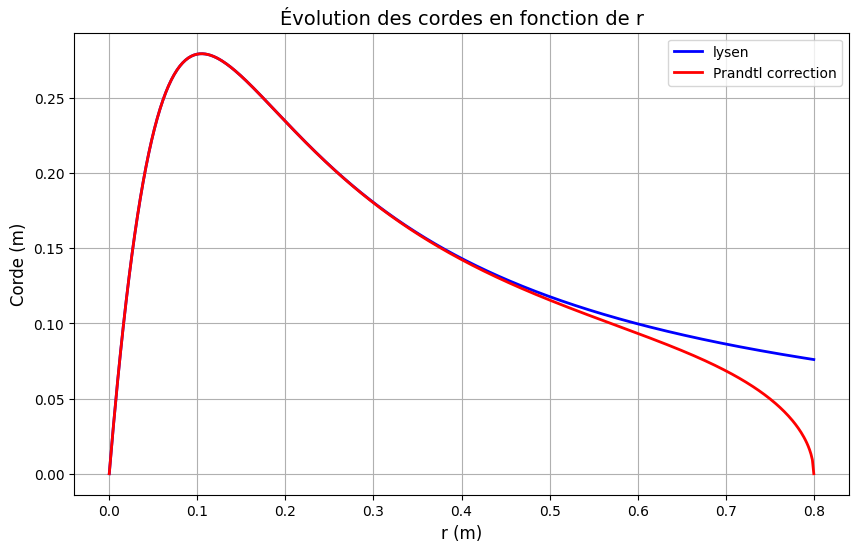

'chord_data.csv'

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def phi(R, r, lambda_):
    """Angle Phi selon Hansen et Lysen"""
    return np.arctan(2 * R  / (3 * lambda_ * r))

def chord_lysen(R, r, B, lambda_, CL_opt, phi):
    """Corde corrigée selon Lysen"""
    return (8 * np.pi * r * (1 - np.cos(phi))) / (B * CL_opt)

def chord_prandtl_correction(R, r, B, lambda_, CL_opt, phi):
    """Corde avec correction de Prandtl"""
    F = (2 / np.pi) * np.arccos(np.exp(-B * (R - r) / (2 * r * np.sin(phi))))
    return (8 * np.pi * r * (1 - np.cos(phi))) / (B * CL_opt) * F 


# Paramètres
lambda_opt = 4  # Rapport de vitesse
R = 0.8       # Rayon de l'éolienne (m)
CL_opt = 1.2    # Coefficient de portance optimal
B = 3           # Nombre de pales

# Positions radiales r (de 0 à R)
r = np.linspace(0, R, 500)

# Calcul de Phi
phi_values = phi(R, r, lambda_opt)

# Calcul des cordes pour chaque méthode
chord_lysen_values = chord_lysen(R, r, B, lambda_opt, CL_opt, phi_values)
chord_prandtl_values = chord_prandtl_correction(R, r, B, lambda_opt, CL_opt, phi_values)

# Tracé des résultats
plt.figure(figsize=(10, 6))
plt.plot(r, chord_lysen_values, label="lysen", lw=2, color="blue")
plt.plot(r, chord_prandtl_values, label="Prandtl correction", lw=2, color="red")

plt.title("Évolution des cordes en fonction de r", fontsize=14)
plt.xlabel("r (m)", fontsize=12)
plt.ylabel("Corde (m)", fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Store data in a DataFrame
data = {
    "r (m)": r,
    "phi (rad)": phi_values,
    "chord (m)": chord_prandtl_values
}
df = pd.DataFrame(data)

# Save to a CSV file
file_path = "chord_data.csv"
df.to_csv(file_path, index=False)
file_path
